<a href="https://colab.research.google.com/github/RohithSriNagulaMalyala/Stock-Price-Prediction-using-LSTM/blob/main/SPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Defining a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()
# df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,282.017487,284.737671,281.041958,283.199346,1963682
1,2010-01-05,282.092499,284.981527,280.103955,283.274381,2014488
2,2010-01-06,275.714020,282.223714,275.019913,282.092381,3349176
3,2010-01-07,268.041260,277.421203,266.765578,275.957922,6474892
4,2010-01-08,262.563507,269.579713,261.325358,268.641718,6048178


In [ ]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-6-e54f1e21f52c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,282.017487,284.737671,281.041958,283.199346,1963682
1,282.092499,284.981527,280.103955,283.274381,2014488
2,275.714020,282.223714,275.019913,282.092381,3349176
3,268.041260,277.421203,266.765578,275.957922,6474892
4,262.563507,269.579713,261.325358,268.641718,6048178


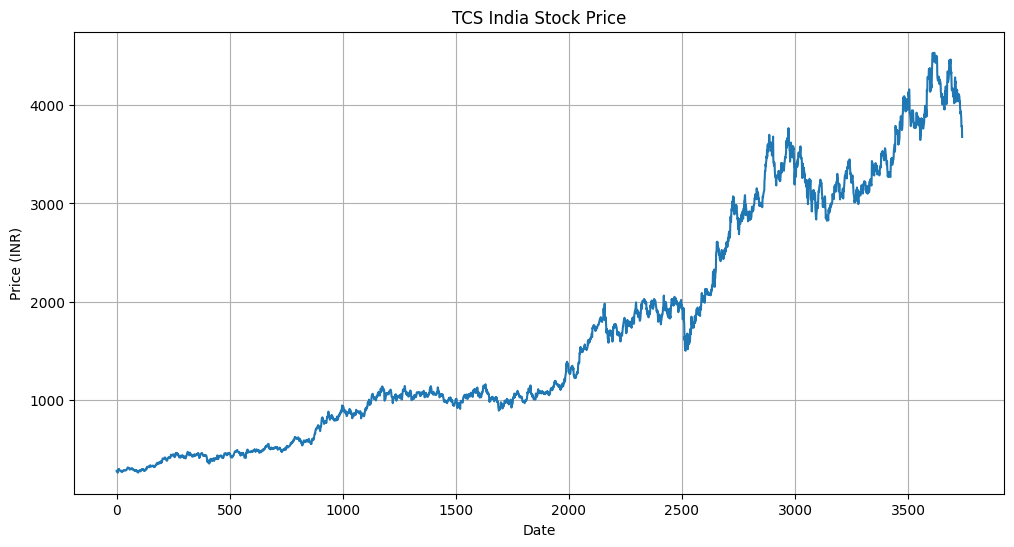

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,282.017487,284.737671,281.041958,283.199346,1963682
1,282.092499,284.981527,280.103955,283.274381,2014488
2,275.714020,282.223714,275.019913,282.092381,3349176
3,268.041260,277.421203,266.765578,275.957922,6474892
4,262.563507,269.579713,261.325358,268.641718,6048178
...,...,...,...,...,...
3735,3873.199951,3924.399902,3864.500000,3898.399902,2149879
3736,3784.100098,3874.949951,3768.149902,3872.199951,4366672
3737,3779.399902,3788.000000,3751.300049,3761.500000,2888572


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3735,4151.964939
3736,4146.925984
3737,4142.240095
3738,4137.427141


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

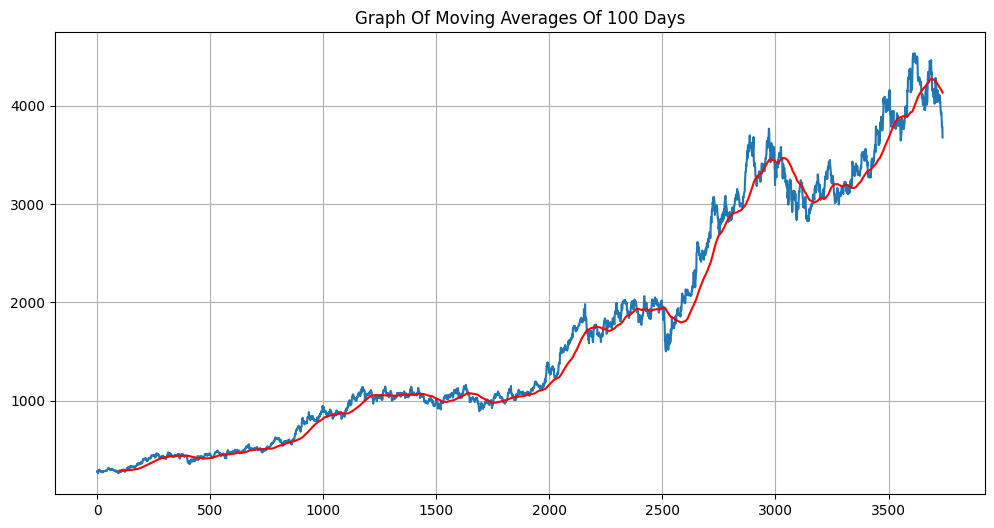

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3735,4131.004108
3736,4130.599237
3737,4129.885498
3738,4129.214618


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

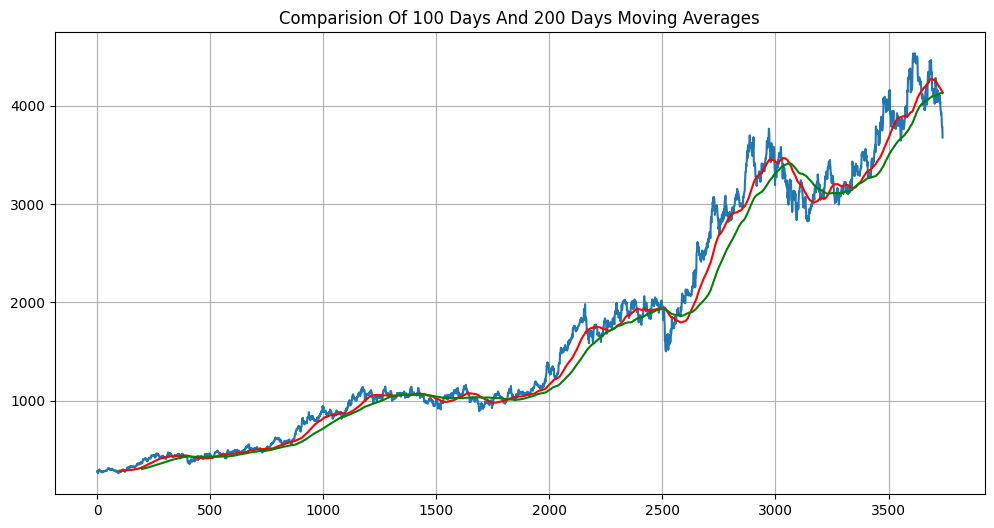

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2618, 6)
(1122, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,282.017487,284.737671,281.041958,283.199346,1963682
1,2010-01-05,282.092499,284.981527,280.103955,283.274381,2014488
2,2010-01-06,275.714020,282.223714,275.019913,282.092381,3349176
3,2010-01-07,268.041260,277.421203,266.765578,275.957922,6474892
4,2010-01-08,262.563507,269.579713,261.325358,268.641718,6048178


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2618,2020-08-18,2094.261719,2112.023383,2074.470195,2087.849111,3493374
2619,2020-08-19,2082.127930,2107.963071,2078.344837,2100.350931,2843005
2620,2020-08-20,2078.668213,2100.535773,2066.857816,2082.497260,2895164
2621,2020-08-21,2074.746094,2095.414113,2067.779789,2085.264595,1975294
2622,2020-08-24,2074.285156,2085.218822,2057.584492,2076.591865,2167966


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01016728],
       [0.0102073 ],
       [0.00957678],
       ...,
       [0.97785173],
       [0.9798202 ],
       [0.97292948]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2518, 100, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - loss: 0.0752 - mean_absolute_error: 0.1949
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0086 - mean_absolute_error: 0.0618
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0074 - mean_absolute_error: 0.0571
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0063 - mean_absolute_error: 0.0546
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0056 - mean_absolute_error: 0.0509
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0054 - mean_absolute_error: 0.0498
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0049 - mean_absolute_error: 0.0470
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0048 - mean_absolute_error: 0.0465
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0045 - mean_absolute_error: 0.0445
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0042 - mean_absolute_error: 0.0447
Epoch 11/100
79/79 ━━━━━━━━

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1122, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,1487.030776
1,1517.367818
2,1560.464549
3,1681.263074
4,1670.615086


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.0098915 ],
       [0.02394335],
       ...,
       [0.74159896],
       [0.74635937],
       [0.73561584]])

In [ ]:
input_data.shape

(1222, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1122, 100, 1)
(1122,)


In [ ]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


In [ ]:
y_pred.shape

(1122, 1)

In [ ]:
scaler.scale_

array([0.00032605])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

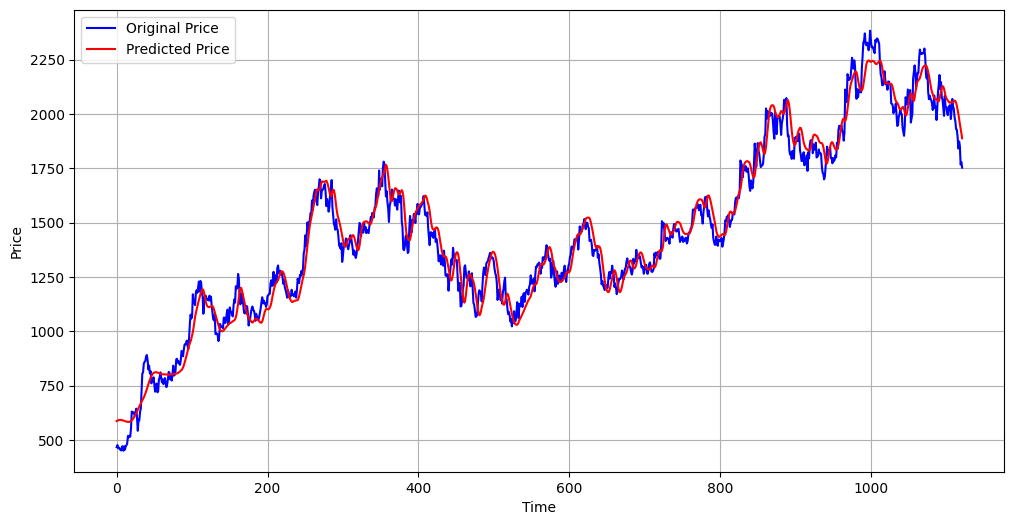

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 3.74%


In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9715081558035908


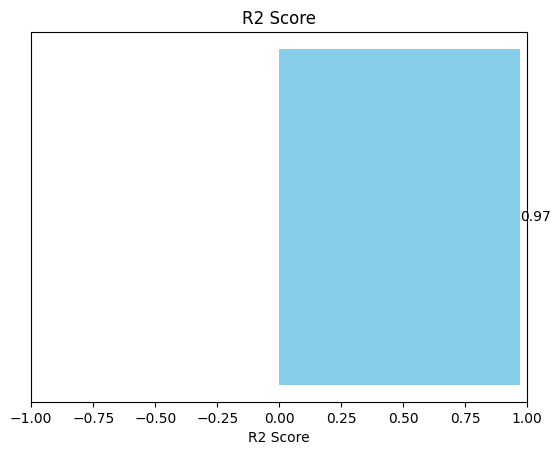

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

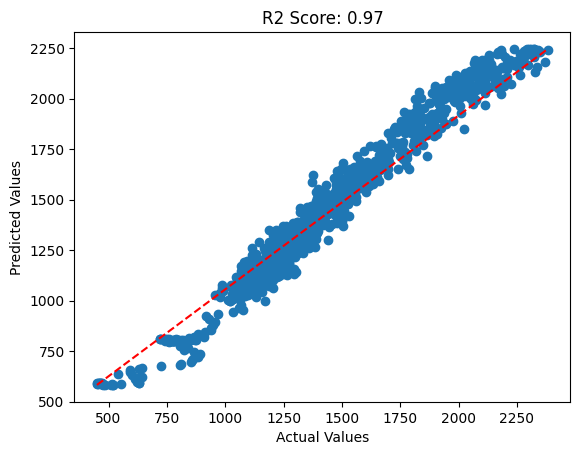

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()